# Exercise 3.1

In this exercise we want to compute via Monte Carlo the European call-option price and the put-option price.
    
In the European option, the holder at a prescribed time $T$ and at a prescribed price $K$, has the right to:
- purchase from the seller of the option; 
- sell to seller of the option.

The holder will use the first option(**Call**) if :$$S(T)>K\quad\implies P=\max[0,S(T)-K]$$
while he will use the second option(**Put**) if :$$S(T)<K\quad\implies P=\max[0,K-S(T)]$$
where $P$ is the profit and $S(t)$ is the asset price at a time $t$.

# <span style="color:red"> Algorithm
    
We can assume that S(t) follows a Geometric Brownian motion with constant risk-free interest $r$ and volatility $\sigma$, then S(t) is given by:
$$S(t)=S(0)e^{(r-\frac{\sigma^2}{2})t+\sigma W(t)}$$
where W(t) is normally distributed ($W(t)\sim\mathcal{N}(0,t)$).

For $t = T$ we can generate $ M $ simulations and for each one we can calculate:
- the call-option price $C[S(0),0]=e^{-rT}\max[0,S(T)-K]$
- the put-option price $P[S(0),0]=e^{-rT}\max[0,K-S(T)]$

and then we apply the *Data Blocking Method* with N blocks 
on C[S(0),0] and P[S(0),0].

We use the following parameters:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$
- number of simulations: $M=10^6$
- number of blocks: $N=10^2$ 

For this problem there is an analytic solution given by Black-Scholes theory, and with our parameters the results are:
$$C[S(0),0]=14.975790778311286$$
$$P[S(0),0]=5.4595325819072364$$


Call Option Price average for N=100:  14.9753  +-  0.0182071


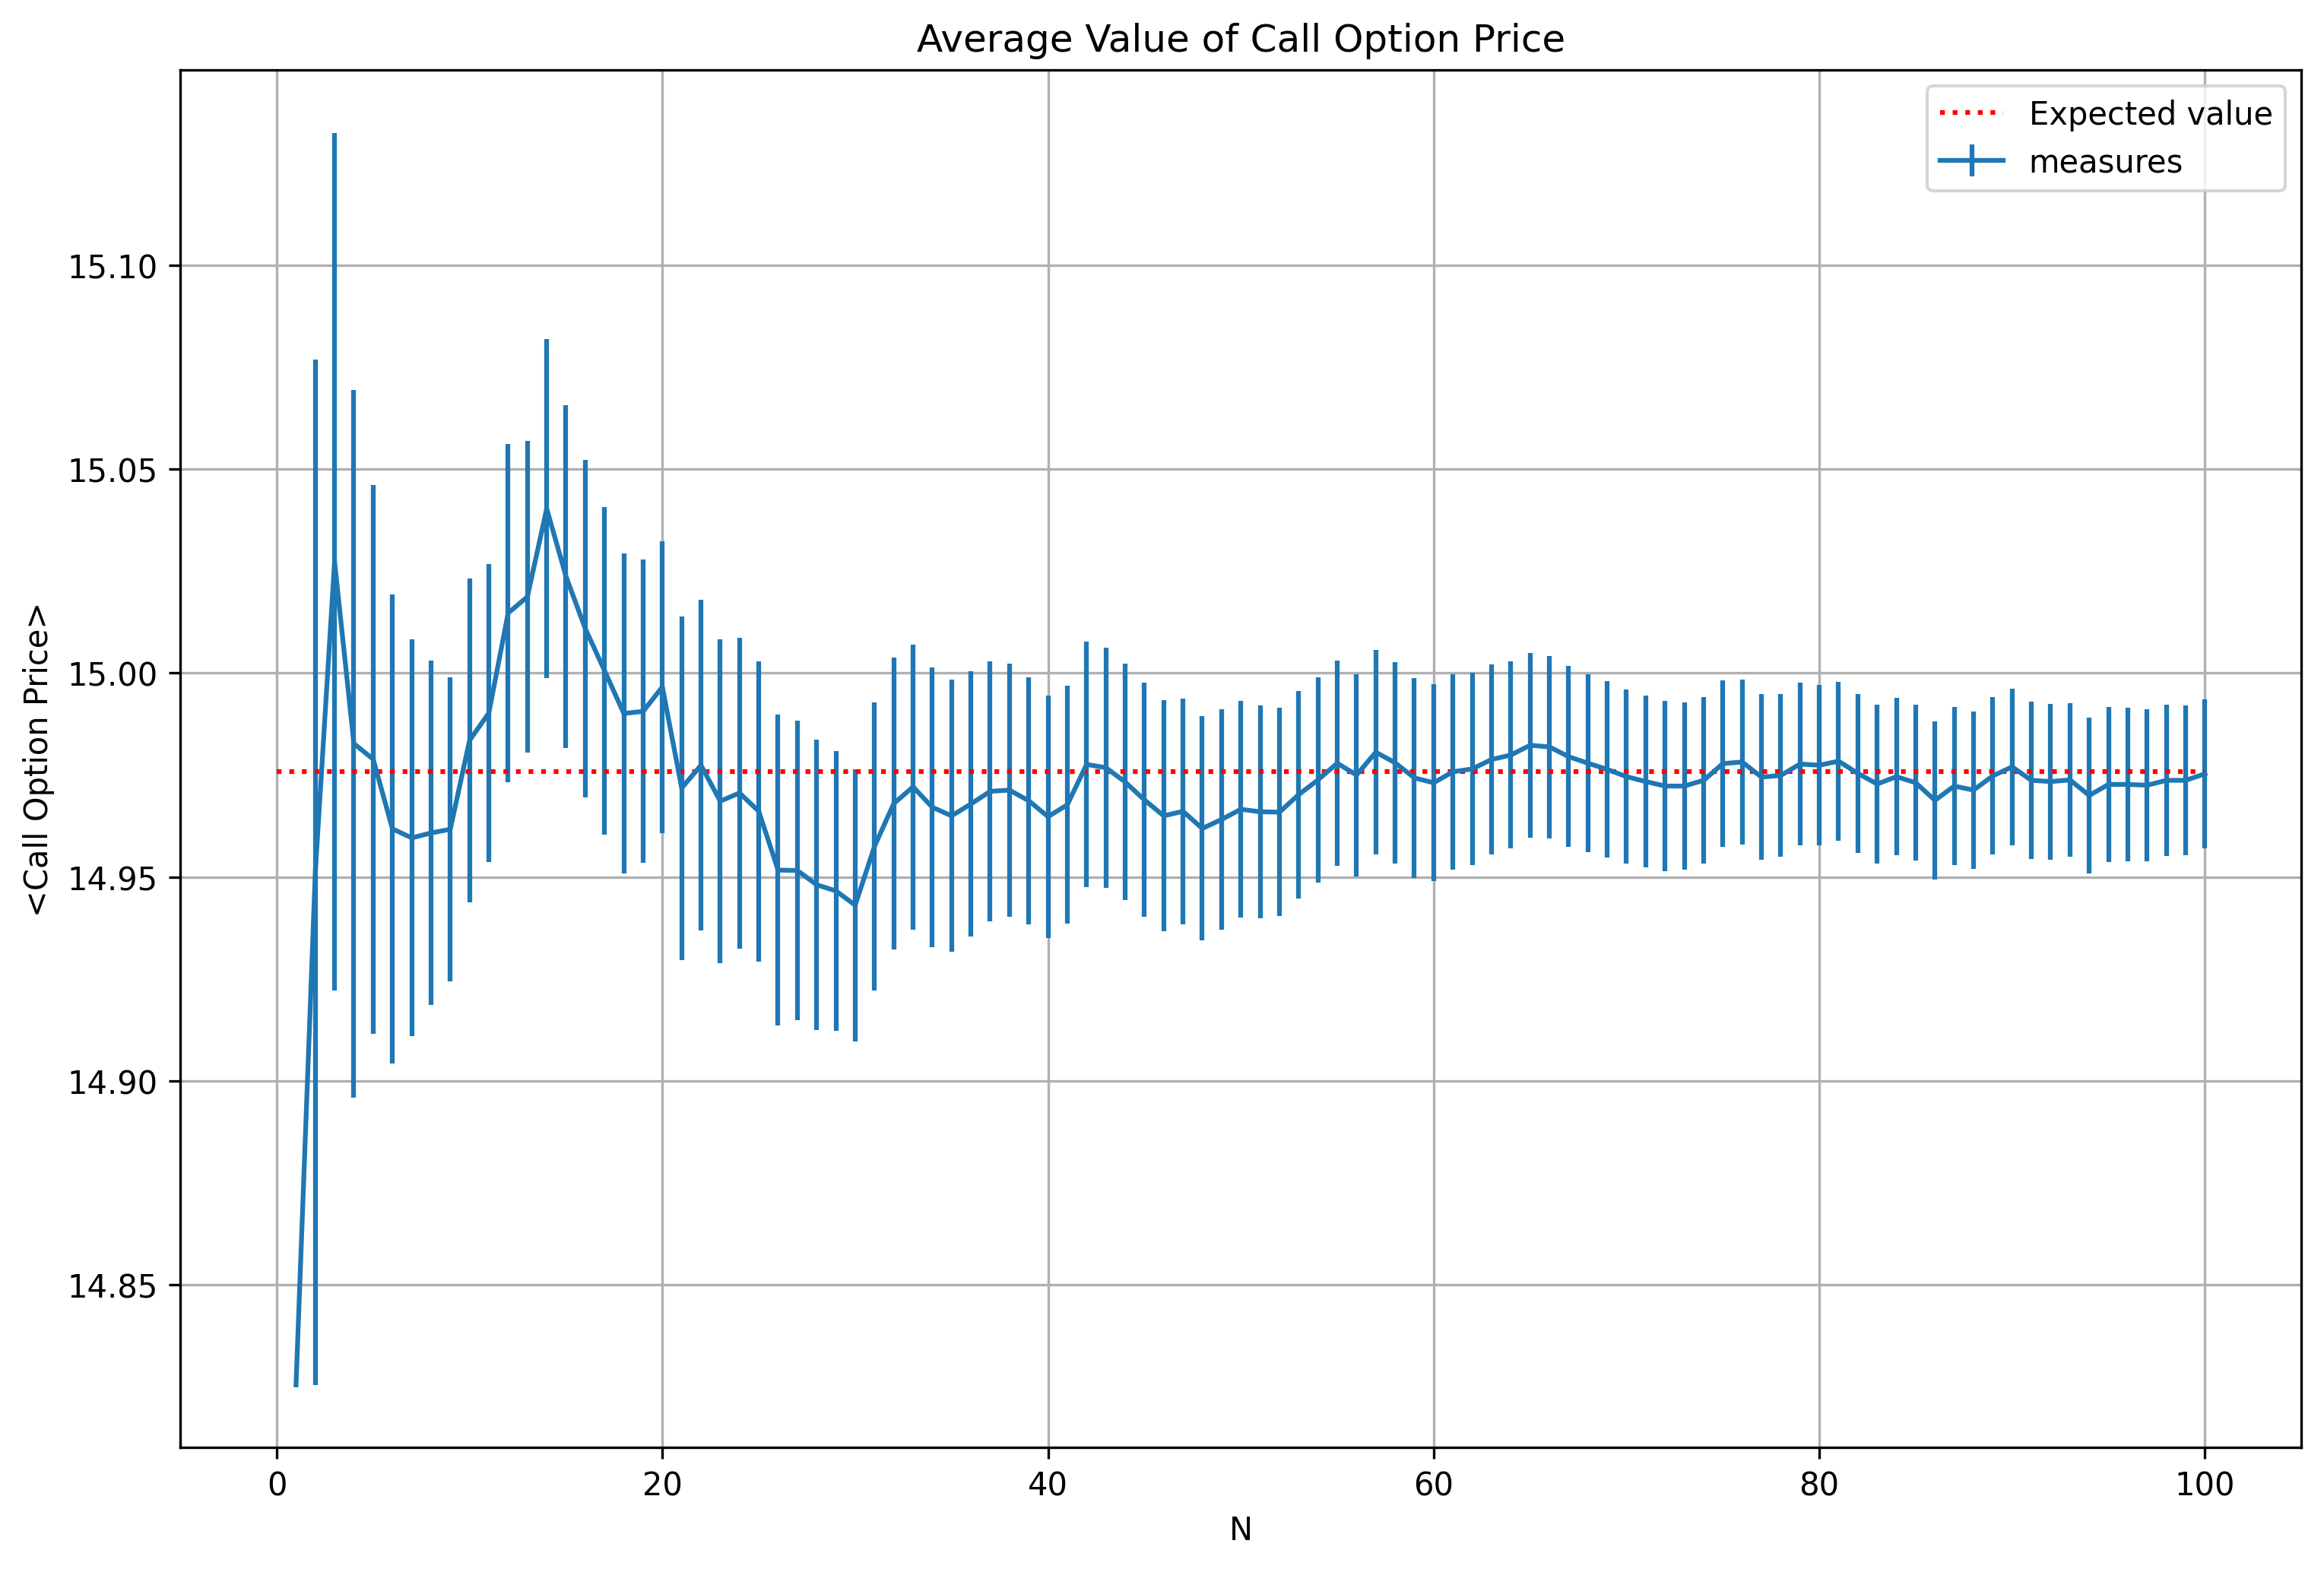

Put Option Price average for N=100:  5.45438  +-  0.00875086


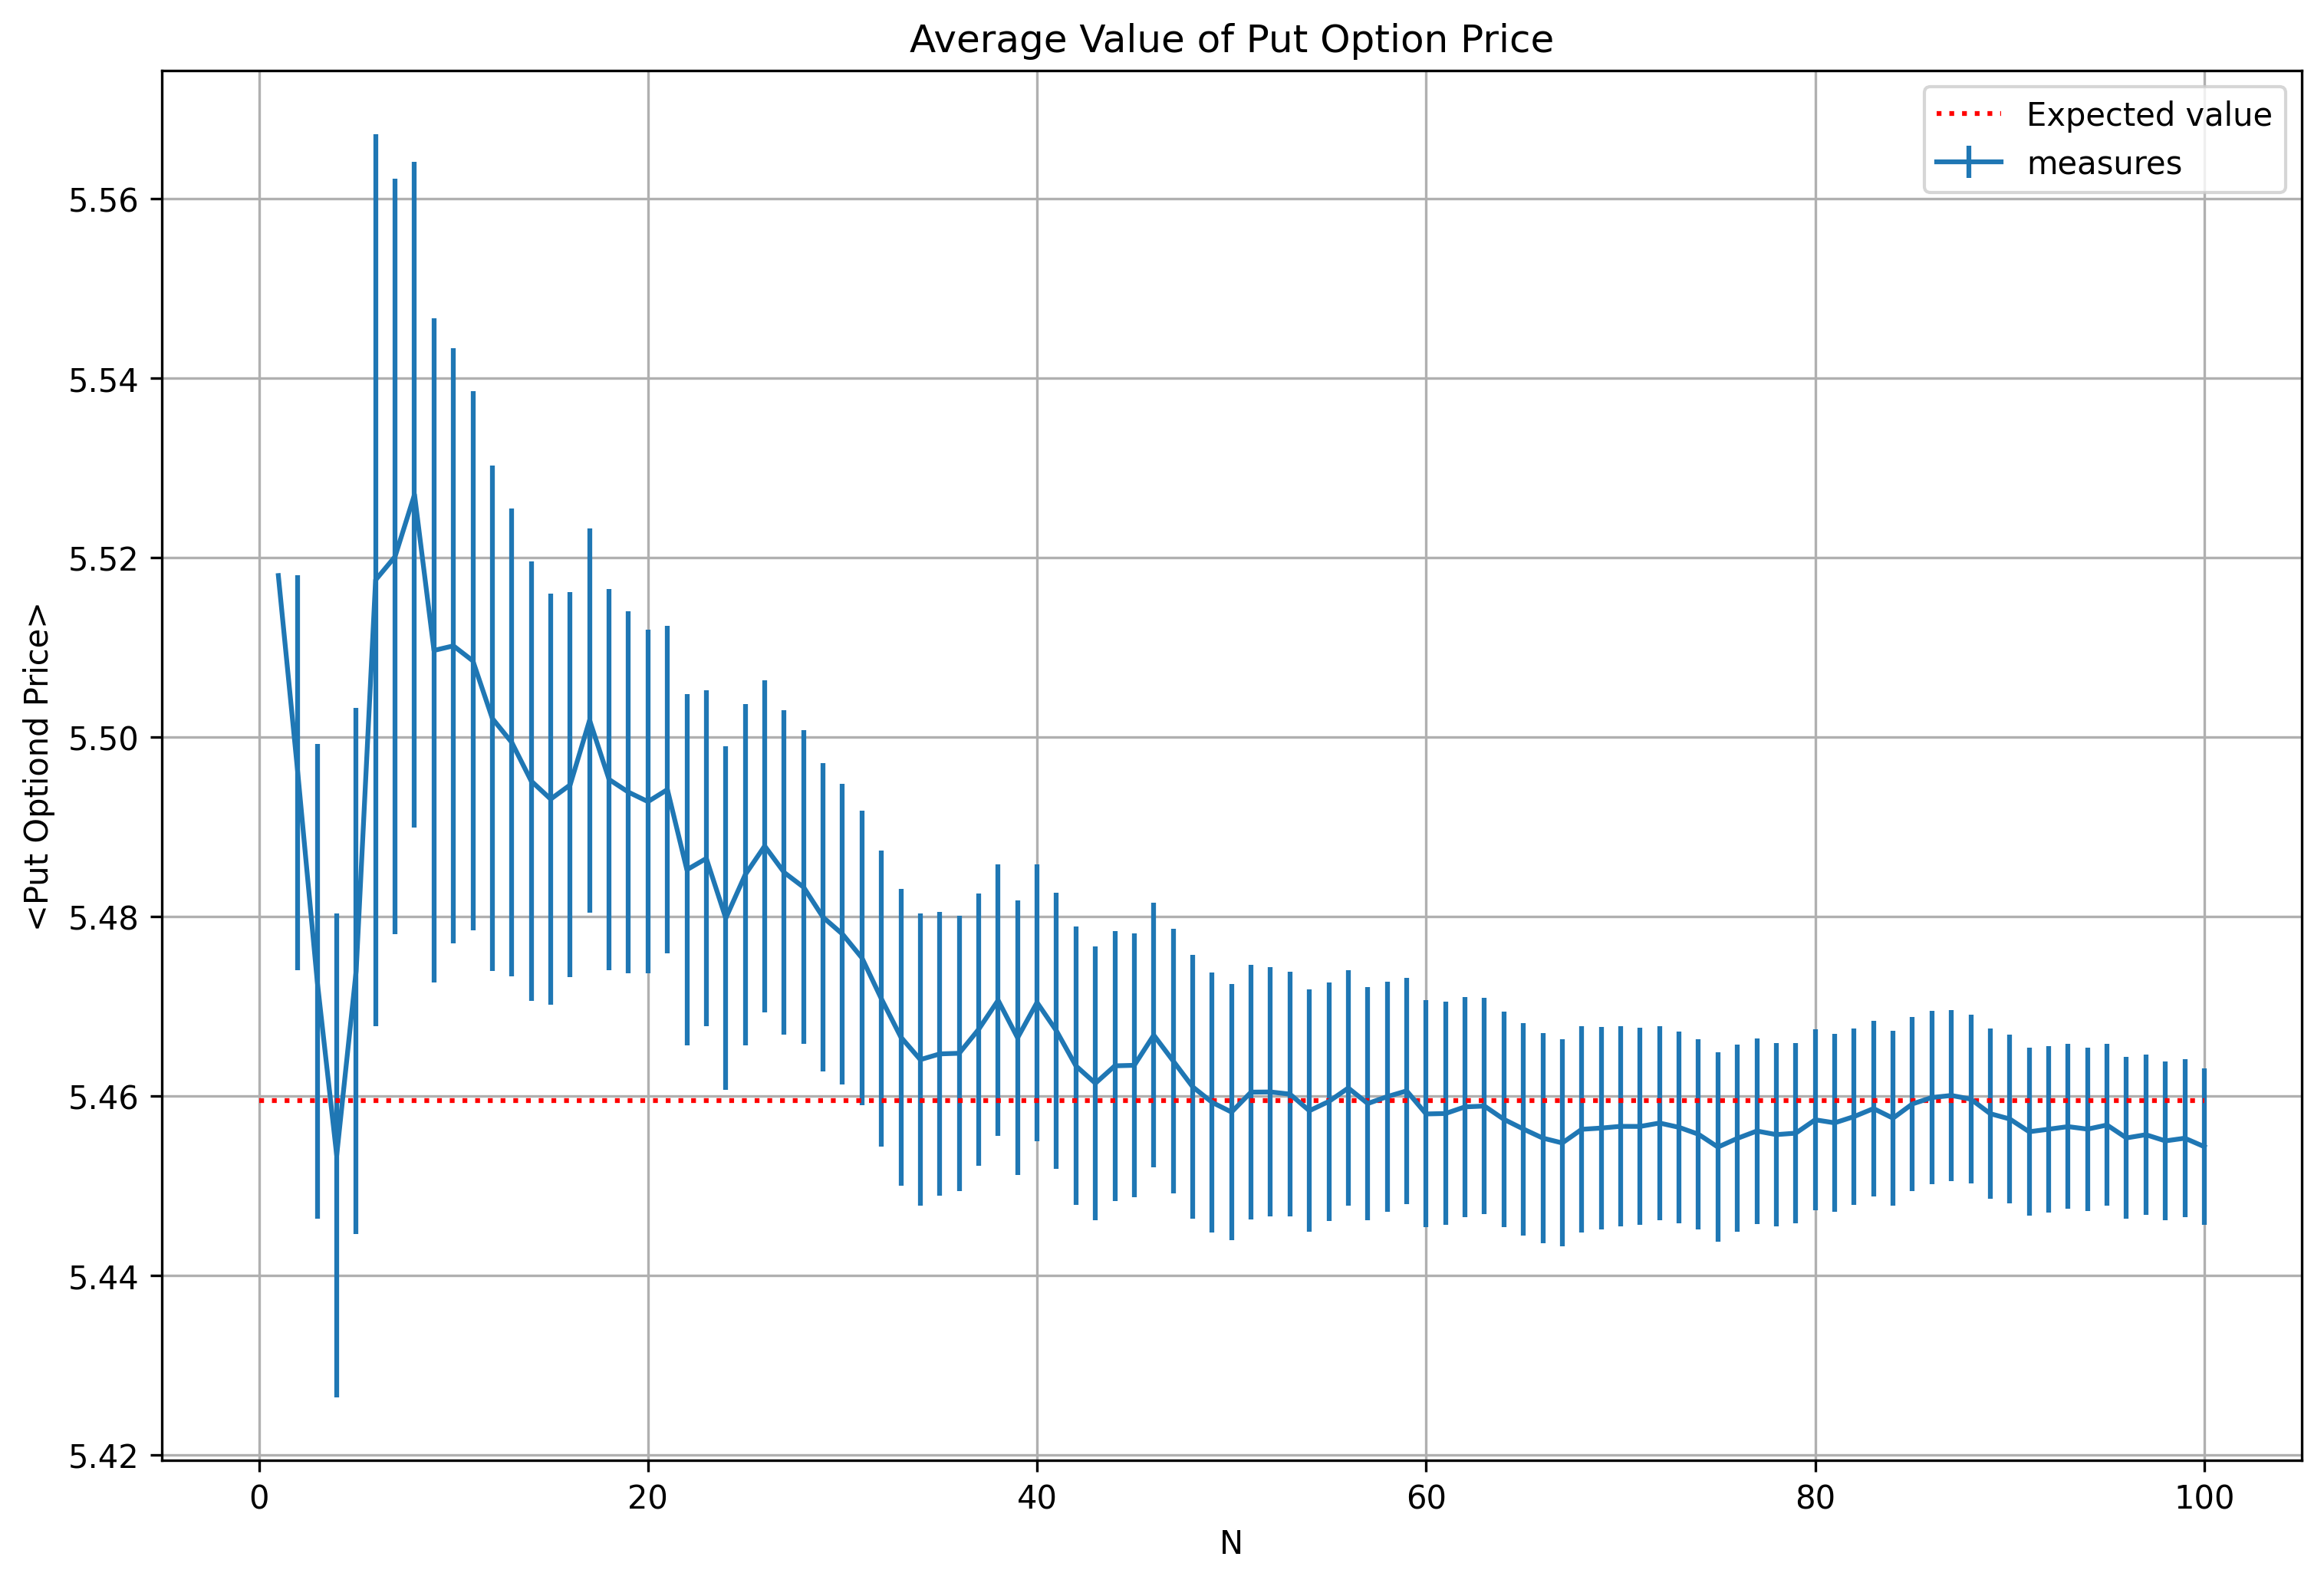

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x, f, error = np.loadtxt("3.1/callDiscrete.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,8),dpi=300)
plt.errorbar(x+1,f,yerr=error,label = "measures")
plt.xlabel('N')
plt.ylabel('<Call Option Price>')
plt.grid(True)

plt.hlines(14.975790778311286,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of Call Option Price")
print("Call Option Price average for N=100: ",f[99]," +- ", error[99])

plt.show()

x, f, error = np.loadtxt("3.1/putDiscrete.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,8),dpi=300)
plt.errorbar(x+1,f,yerr=error,label = "measures")
plt.xlabel('N')
plt.ylabel('<Put Optiond Price>')
plt.grid(True)

plt.hlines(5.4595325819072364,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of Put Option Price")
print("Put Option Price average for N=100: ",f[99]," +- ", error[99])

plt.show()


The graphs show the expected value is within 1.5 standard deviations from the measured value.

We can also measure S(T) in a discrete way, by calculating:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
with $Z_i \sim \mathcal{N}(0,1)$ and $0=t_0 < t_1 < … < t_n=T$.
In the algorithm n is equal to 100 and each interval $t_{i+1}-t_{i}$ is equal to $\frac{T}{100}$.

Call Option Price average for N=100:  14.9807  +-  0.0191832


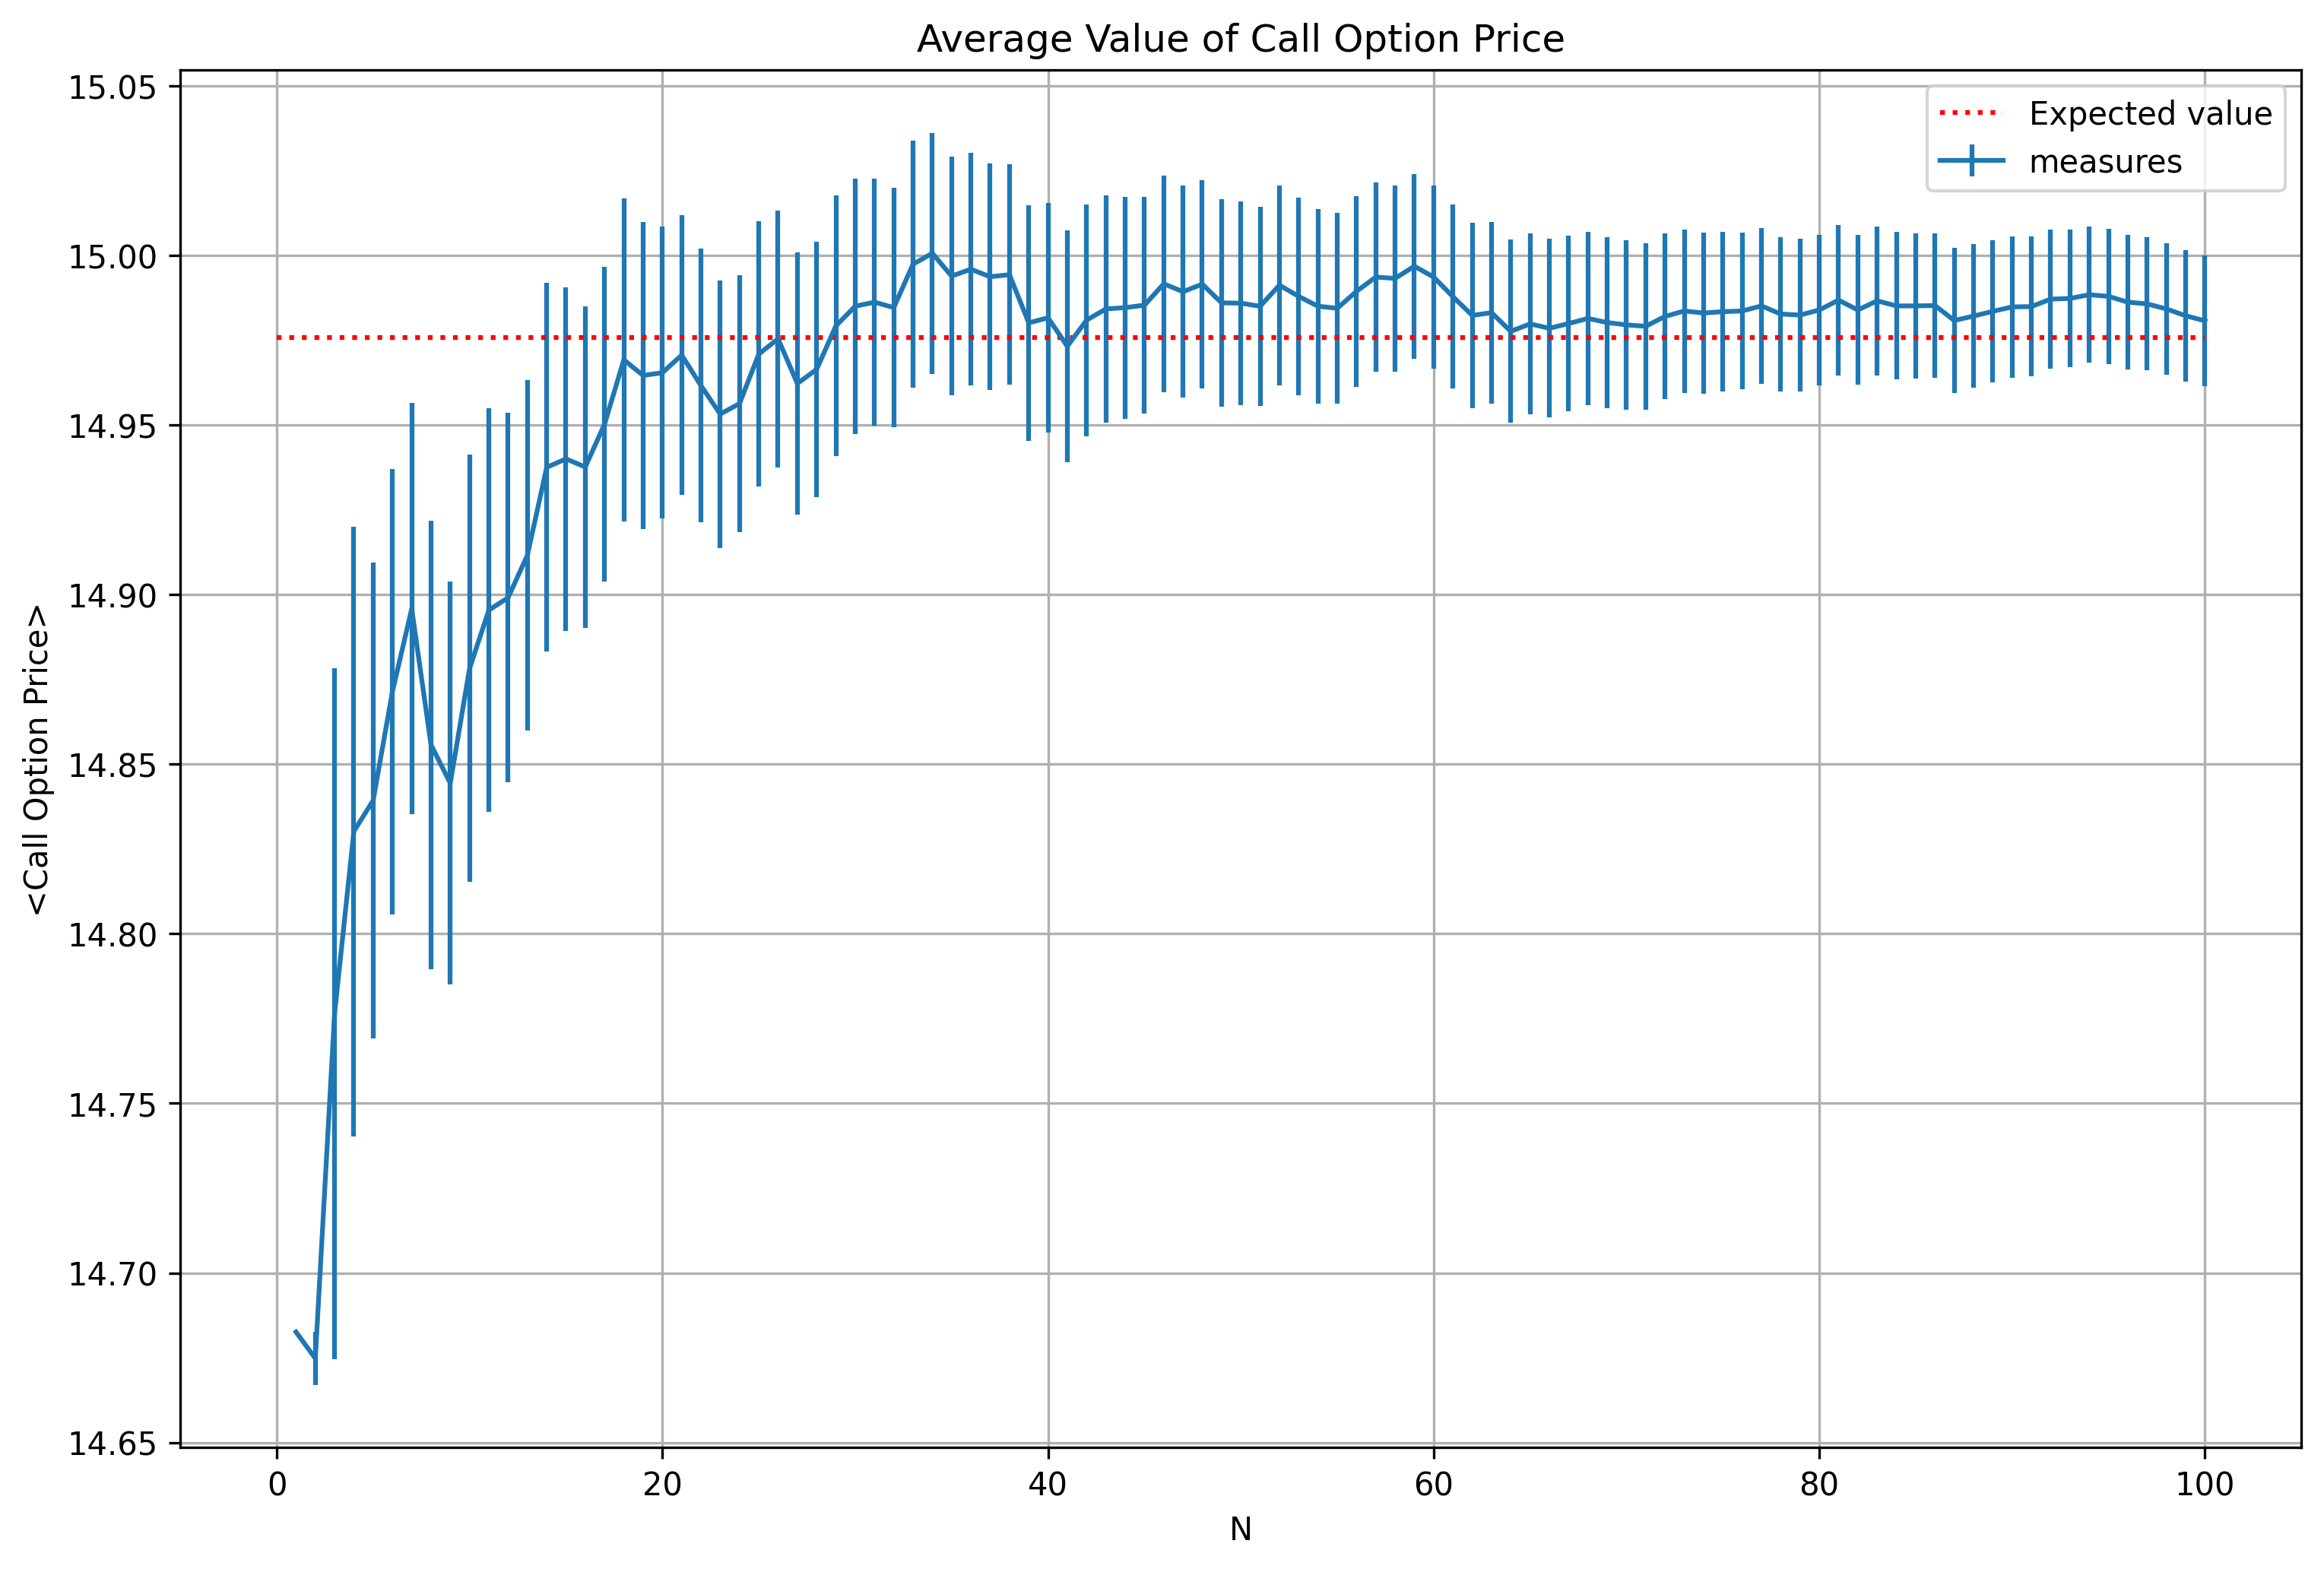

Put Option Price average for N=100:  5.4527  +-  0.00923075


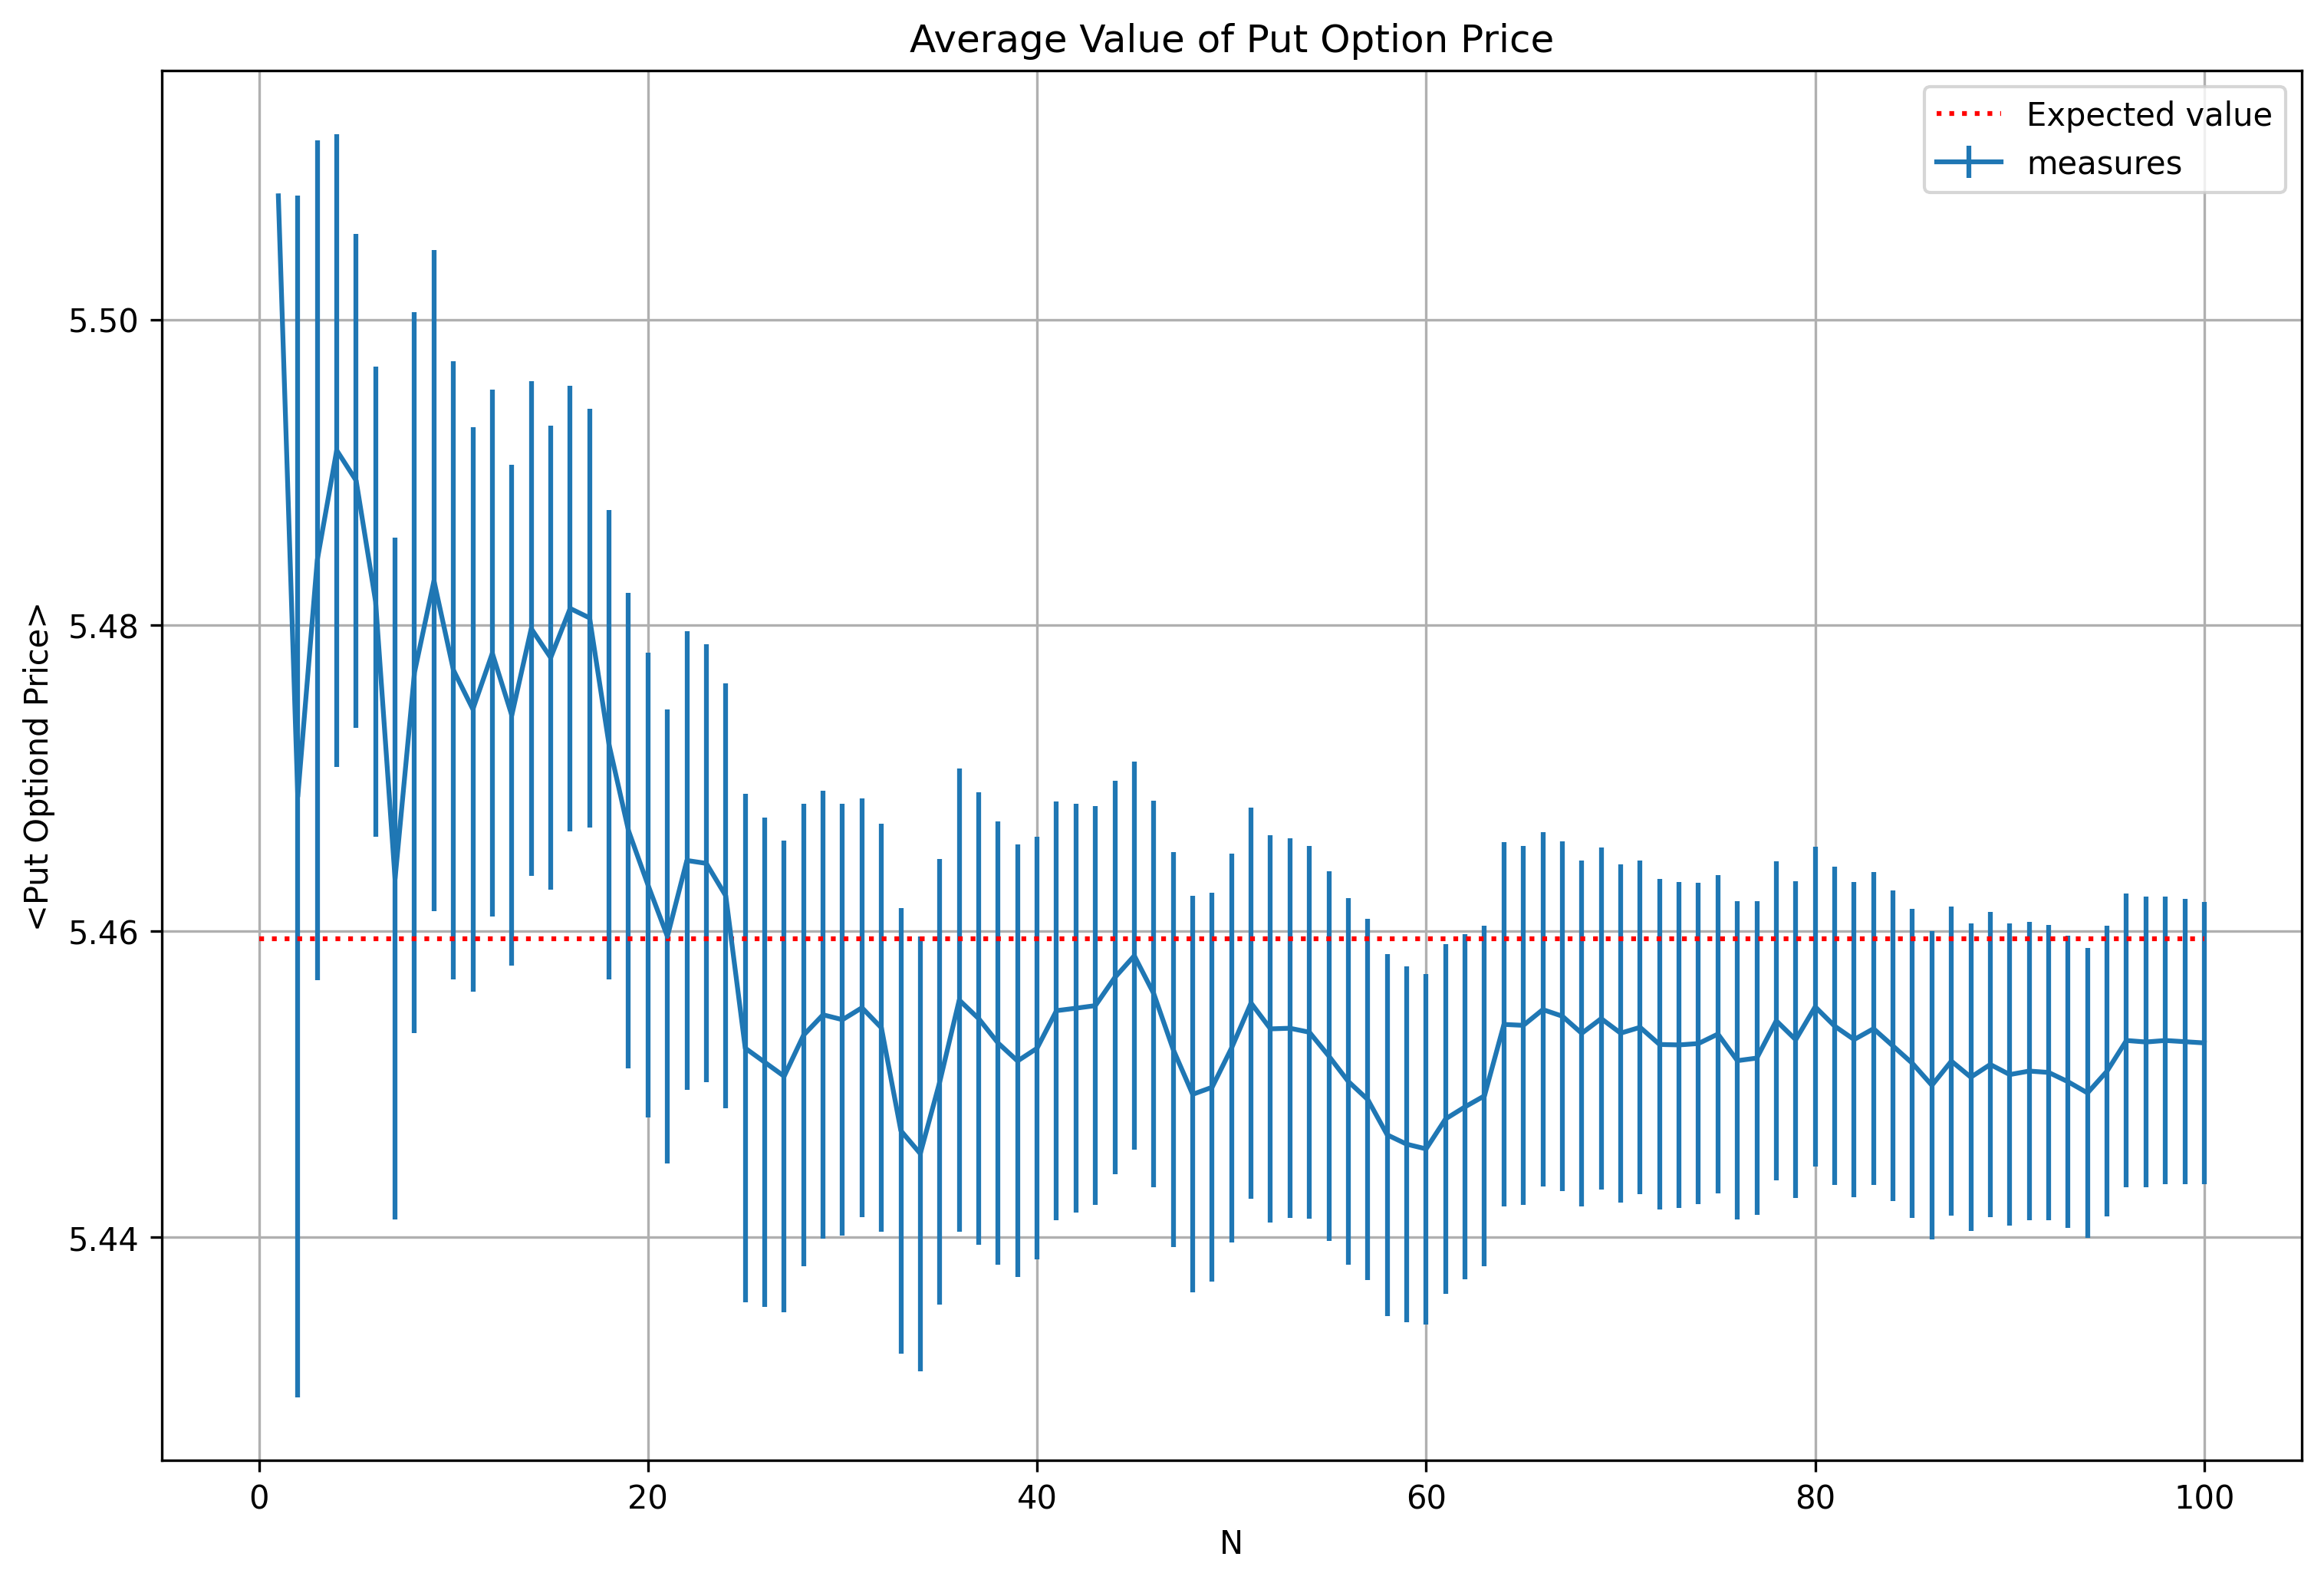

In [2]:
x, f, error = np.loadtxt("3.1/callContinue.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,8),dpi=300)
plt.errorbar(x+1,f,yerr=error,label = "measures")
plt.xlabel('N')
plt.ylabel('<Call Option Price>')
plt.grid(True)

plt.hlines(14.975790778311286,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of Call Option Price")
print("Call Option Price average for N=100: ",f[99]," +- ", error[99])

plt.show()

x, f, error = np.loadtxt("3.1/putContinue.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,8),dpi=300)
plt.errorbar(x+1,f,yerr=error,label = "measures")
plt.xlabel('N')
plt.ylabel('<Put Optiond Price>')
plt.grid(True)

plt.hlines(5.4595325819072364,0,100,colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.title("Average Value of Put Option Price")
print("Put Option Price average for N=100: ",f[99]," +- ", error[99])

plt.show()



The previous plots show that the results are within one standard deviation from the expected values.